In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import os

In [57]:
if False: # Open the attributes from the coding workshop. These are already set up to do regression
    openthis = '/home/NearingLab/data/camels_all_coding_workshop.csv'
    attributes = pd.read_csv(openthis, sep=',', index_col='gauge_id')
else: # Open a slightly more extrnsive data set.
    openthis = '/home/NearingLab/data/camels_attributes_v2.0/camels_all.txt'
    attributes = pd.read_csv(openthis, sep=';', index_col='gauge_id')
    
# Add the basin ID as a 8 element string with a leading zero if neccessary
basin_id_str = []
for a in attributes.index.values:
    basin_id_str.append(str(a).zfill(8))
attributes['basin_id_str'] = basin_id_str


In [58]:
data_dir = "/home/jmframe/data/camels_ngen_hydrofabric/"
file_suffix = "/parameters/camels.csv"

In [59]:
for dirpath, dirs, files in os.walk(data_dir):
    hydrofabric_camels_directories = dirs
    break

In [60]:
attributes.columns.values

array(['p_mean', 'pet_mean', 'p_seasonality', 'frac_snow', 'aridity',
       'high_prec_freq', 'high_prec_dur', 'high_prec_timing',
       'low_prec_freq', 'low_prec_dur', 'low_prec_timing',
       'geol_1st_class', 'glim_1st_class_frac', 'geol_2nd_class',
       'glim_2nd_class_frac', 'carbonate_rocks_frac', 'geol_porostiy',
       'geol_permeability', 'frac_forest', 'lai_max', 'lai_diff',
       'gvf_max', 'gvf_diff', 'dom_land_cover_frac', 'dom_land_cover',
       'root_depth_50', 'root_depth_99', 'soil_depth_pelletier',
       'soil_depth_statsgo', 'soil_porosity', 'soil_conductivity',
       'max_water_content', 'sand_frac', 'silt_frac', 'clay_frac',
       'water_frac', 'organic_frac', 'other_frac', 'gauge_lat',
       'gauge_lon', 'elev_mean', 'slope_mean', 'area_gages2',
       'area_geospa_fabric', 'q_mean', 'runoff_ratio', 'slope_fdc',
       'baseflow_index', 'stream_elas', 'q5', 'q95', 'high_q_freq',
       'high_q_dur', 'low_q_freq', 'low_q_dur', 'zero_q_freq', 'hfd_mean',

In [61]:
label_dict = {'meanPPT':'p_mean', 
              'snowFrac':'frac_snow', 
              'high_ppt_freq':'high_prec_freq', 
              'low_ppt_freq':'low_prec_freq',
              'high_ppt_dur':'high_prec_dur', 
              'low_ppt_dur':'low_prec_dur', 
              'elevation':'elev_mean', 
              'slope':'slope_mean', 
              'areasqkm':'area_gages2',
              'soil_depth_pelletier':'soil_depth_pelletier', 
              'clay-1m-percent':'clay_frac',
              'permeability_permafrost':'geol_permeability', 
              'rockdepm':'soil_depth_pelletier', 
              'sand-1m-percent':'sand_frac',
              'silt-1m-percent':'silt_frac', 
              'carbonate_rocks_frac':'carbonate_rocks_frac', 
              'soil_conductivity':'soil_conductivity',
              'geol_porostiy':'geol_porostiy', 
              'max_water_content':'max_water_content', 
              'aridity':'aridity', 
              'pet_mean':'pet_mean',
              'forest':'frac_forest', 
              'dom_lc':'dom_land_cover', 
              'gvf_diff':'gvf_diff', 
              'gvf_max':'gvf_max', 
              'lai_diff':'lai_diff', 
              'lai_max':'lai_max'}

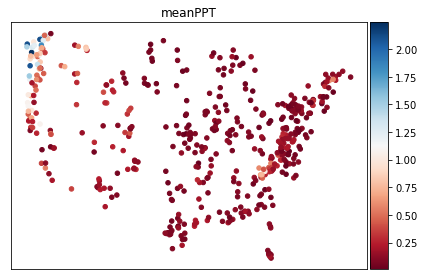

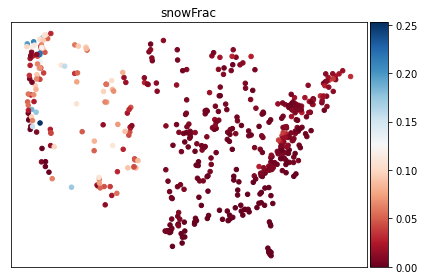

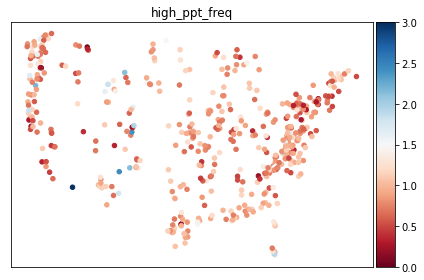

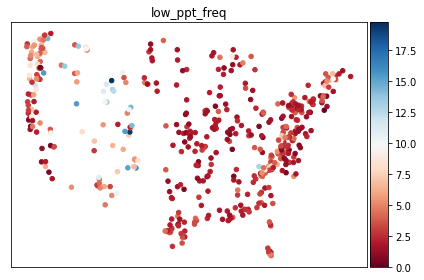

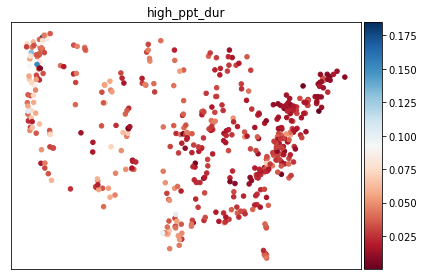

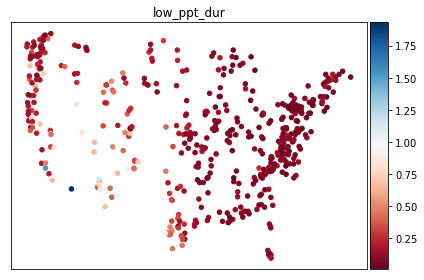

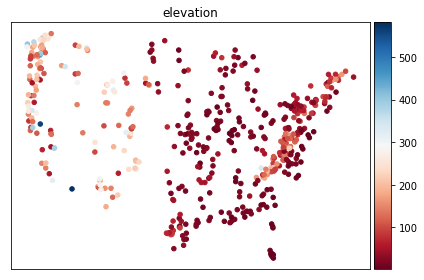

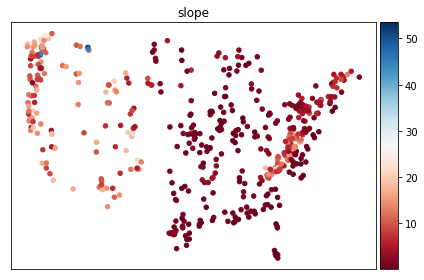

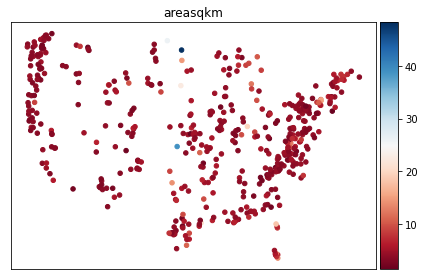

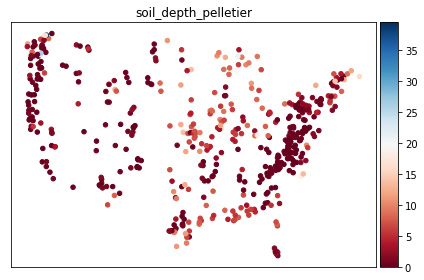

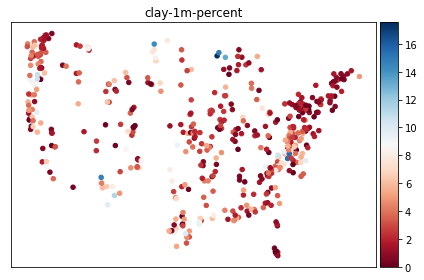

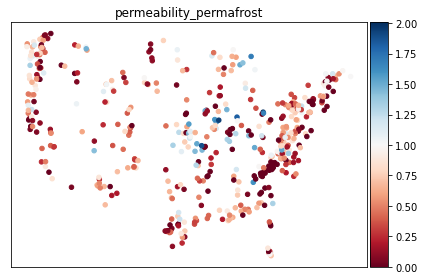

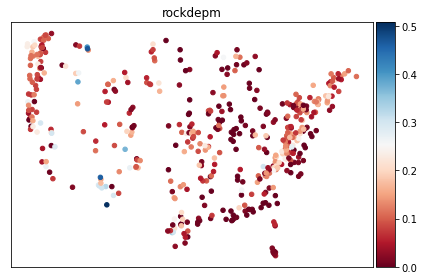

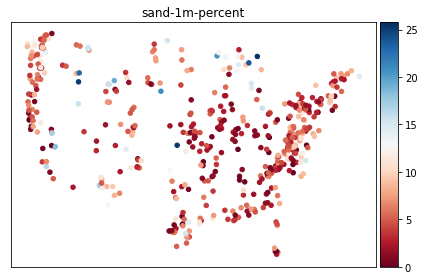

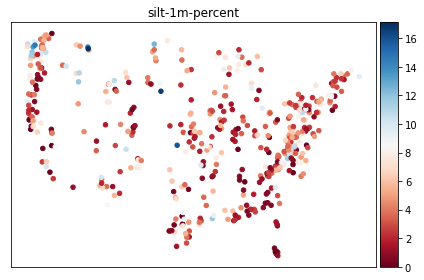

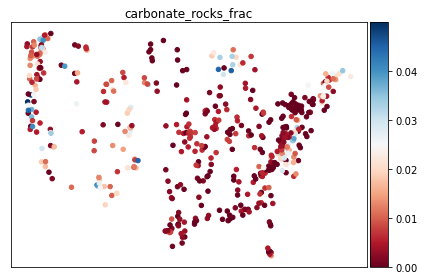

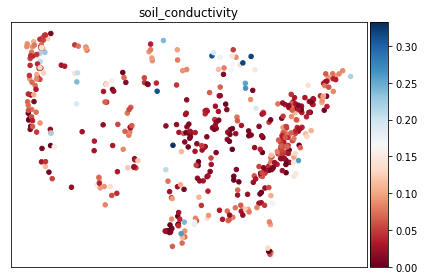

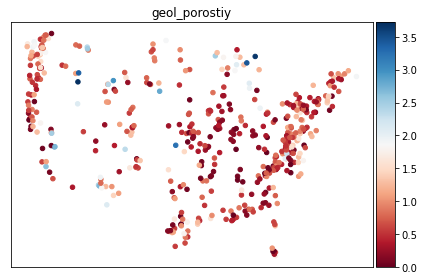

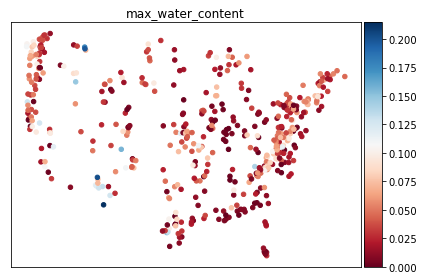

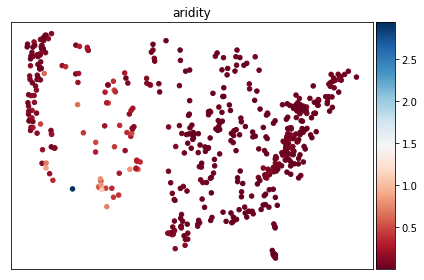

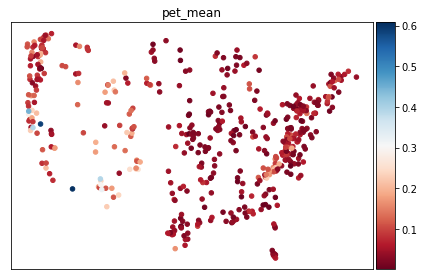

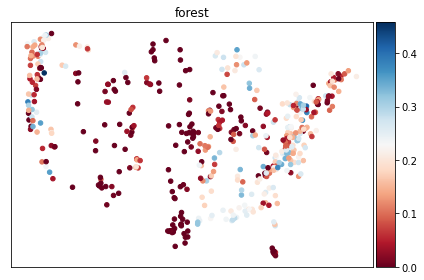

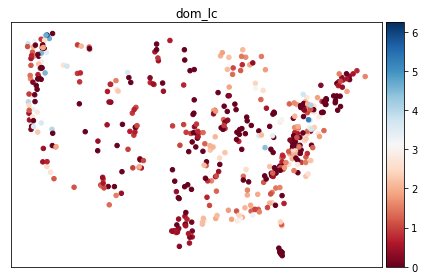

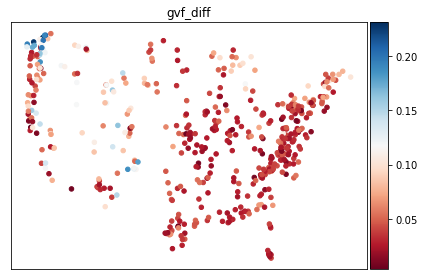

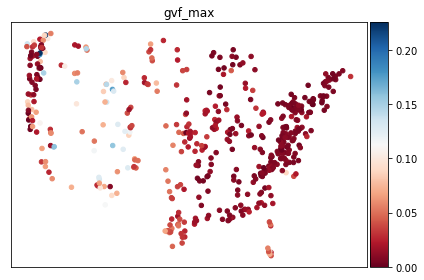

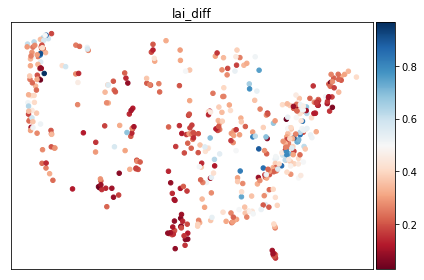

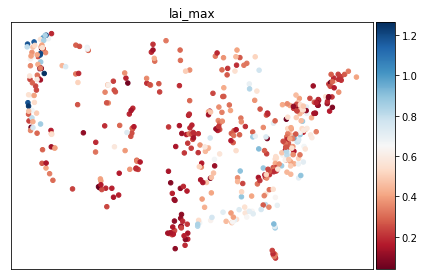

In [55]:

for test_value_name in ['meanPPT', 'snowFrac', 'high_ppt_freq', 'low_ppt_freq',
       'high_ppt_dur', 'low_ppt_dur', 'elevation', 'slope', 'areasqkm',
       'soil_depth_pelletier', 'clay-1m-percent',
       'permeability_permafrost', 'rockdepm', 'sand-1m-percent',
       'silt-1m-percent', 'carbonate_rocks_frac', 'soil_conductivity',
       'geol_porostiy', 'max_water_content', 'aridity', 'pet_mean',
       'forest', 'dom_lc', 'gvf_diff', 'gvf_max', 'lai_diff', 'lai_max']:

    test_value_list = []
    test_value_df = pd.DataFrame(columns=[test_value_name, "lat", "lon"])
    for camels_basin_dir in hydrofabric_camels_directories:
        if camels_basin_dir == "base-runs":
            continue

        camels_basin_str = str(camels_basin_dir.split("_")[1])
        camels_basin_int = int(camels_basin_dir.split("_")[1])
    #    print("basin", camels_basin_int)

        try:
            with open(f"{data_dir}{camels_basin_dir}{file_suffix}", "r") as f:
                basin_attributes = pd.read_csv(f)

        except:
            #print(f"Basin {camels_basin_str} not available")
            continue

        test_value_df.loc[camels_basin_str, test_value_name] = basin_attributes.std()[test_value_name]
        test_value_df.loc[camels_basin_str, "lat"] = attributes.loc[camels_basin_int, "gauge_lat"]
        test_value_df.loc[camels_basin_str, "lon"] = attributes.loc[camels_basin_int, "gauge_lon"] 

    
    
    
    fig = plt.figure()
    ax = fig.add_subplot()

    im = ax.scatter(test_value_df.loc[:, 'lon'].values, 
                             test_value_df.loc[:, 'lat'].values,
                            c=test_value_df.loc[:, test_value_name].values,
                            s=20,
                            cmap='RdBu',
                   #         vmin=-1, 
                   #         vmax=1
                   )
    ax.set_title(test_value_name)

    #        ax.set_xlabels([])
    ax.set_xticks(ticks=[])
    ax.set_yticks(ticks=[])

    clims = im.get_clim()


    # colorbar
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im, cax=cax, orientation='vertical')

    plt.tight_layout()
    plt.show()
    plt.close()

In [42]:
test_value_df

,meanPPT,lat,lon
06409000,0.064167,44.01359,-103.83048
11523200,0.29355,41.11126,-122.70558
06470800,0.083123,46.22524,-98.07177
01187300,0.015632,42.03732,-72.93899
03455500,0.492232,35.39611,-82.9375
...,...,...,...
01516500,0.088984,41.79091,-77.01469
02430085,0.063615,34.46667,-88.28361
02369800,0.069552,31.02768,-86.70996
12390700,0.572934,47.58605,-115.35515


NameError: name 'make_axes_locatable' is not defined

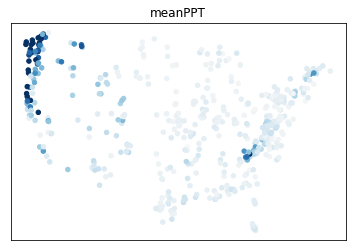

In [49]:
fig = plt.figure()
ax = fig.add_subplot()

im = ax.scatter(test_value_df.loc[:, 'lon'].values, 
                         test_value_df.loc[:, 'lat'].values,
                        c=test_value_df.loc[:, test_value_name].values,
                        s=20,
                        cmap='RdBu',
                        vmin=-1, 
                        vmax=1)
ax.set_title(test_value_name)

#        ax.set_xlabels([])
ax.set_xticks(ticks=[])
ax.set_yticks(ticks=[])

clims = im.get_clim()


# colorbar
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im, cax=cax, orientation='vertical')

plt.tight_layout()
plt.show()
plt.close()

In [51]:
basin_attributes.columns.values

array(['ID', 'meanPPT', 'snowFrac', 'high_ppt_freq', 'low_ppt_freq',
       'high_ppt_dur', 'low_ppt_dur', 'elevation', 'slope', 'areasqkm',
       'soil_depth_pelletier', 'clay-1m-percent',
       'permeability_permafrost', 'rockdepm', 'sand-1m-percent',
       'silt-1m-percent', 'carbonate_rocks_frac', 'soil_conductivity',
       'geol_porostiy', 'max_water_content', 'aridity', 'pet_mean',
       'forest', 'dom_lc', 'gvf_diff', 'gvf_max', 'lai_diff', 'lai_max'],
      dtype=object)

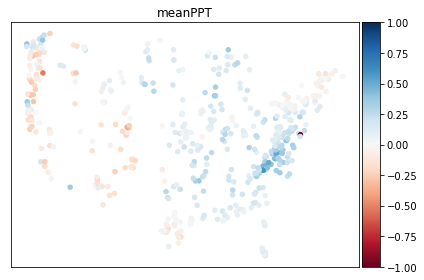

/home/jmframe/programs/anaconda3/envs/mc-paper/lib/python3.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in double_scalars


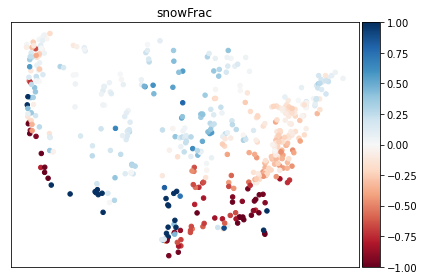

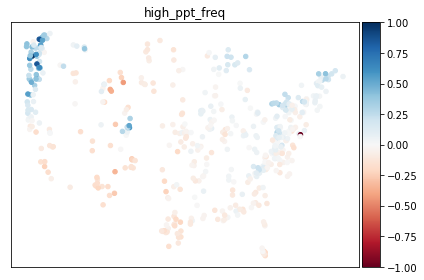

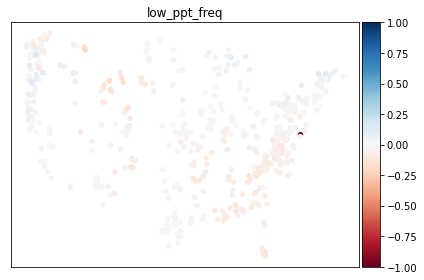

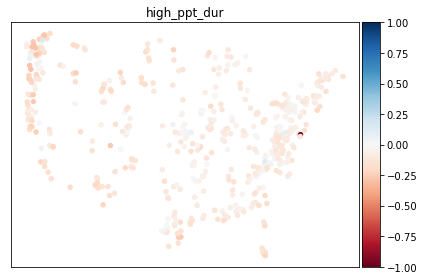

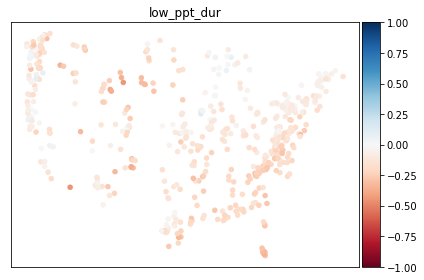

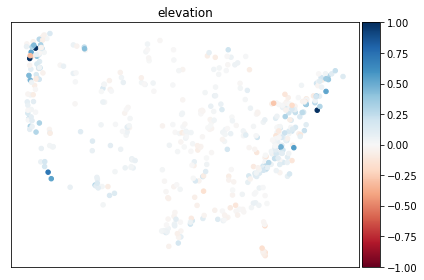

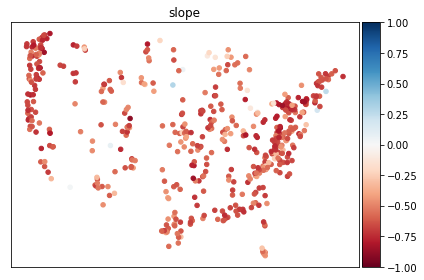

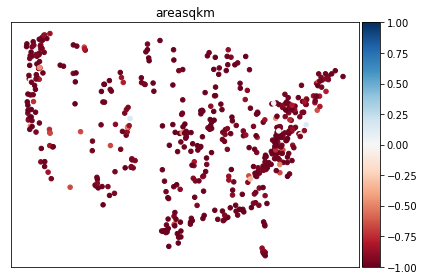

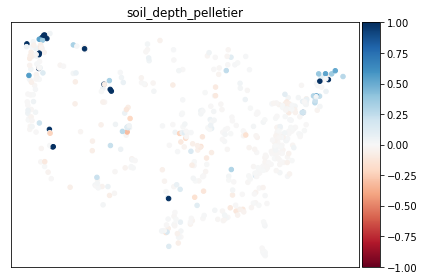

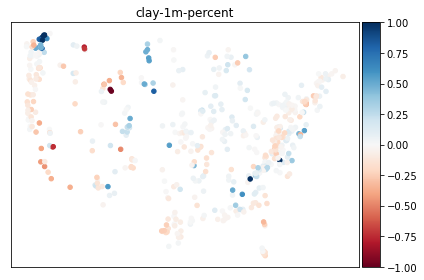

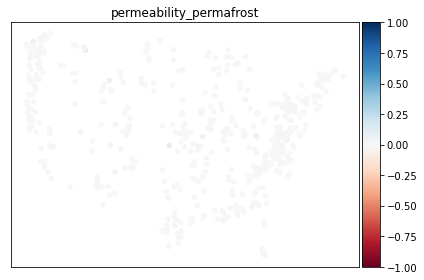

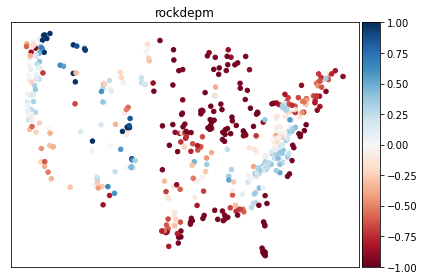

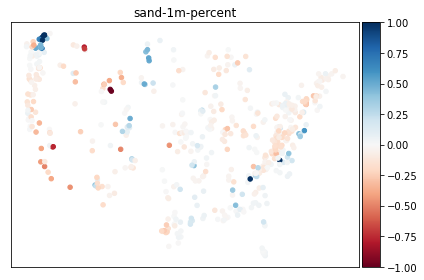

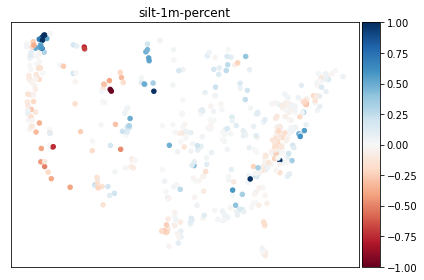

/home/jmframe/programs/anaconda3/envs/mc-paper/lib/python3.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: divide by zero encountered in double_scalars


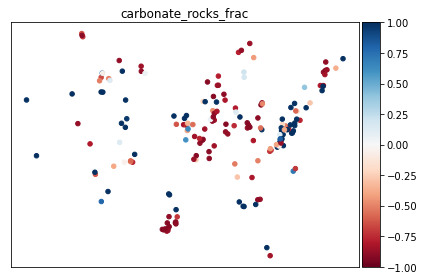

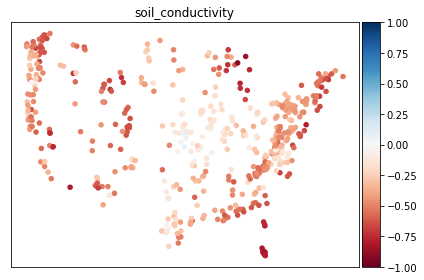

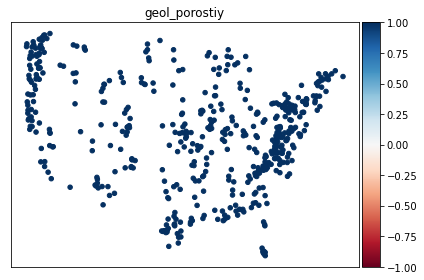

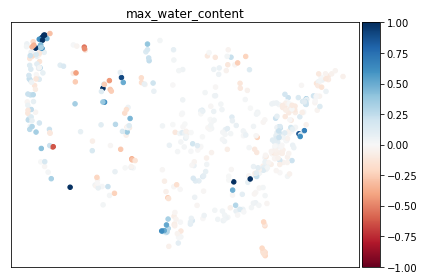

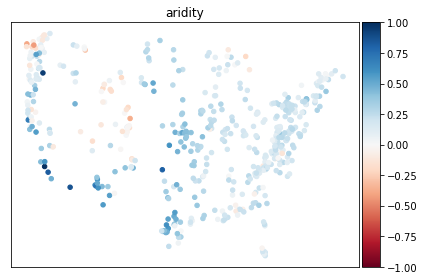

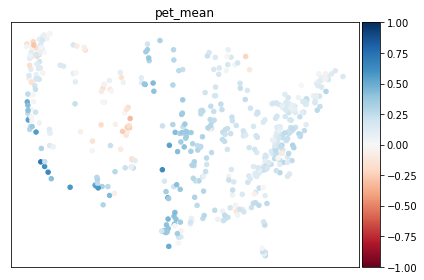

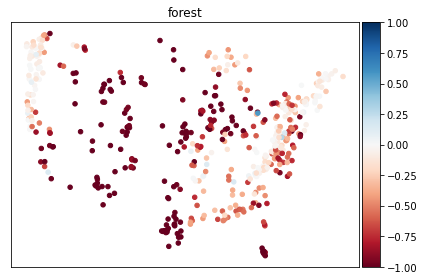

UFuncTypeError: ufunc 'subtract' did not contain a loop with signature matching types (dtype('<U32'), dtype('<U32')) -> dtype('<U32')

In [71]:

for test_value_name in ['meanPPT', 'snowFrac', 'high_ppt_freq', 'low_ppt_freq',
       'high_ppt_dur', 'low_ppt_dur', 'elevation', 'slope', 'areasqkm',
       'soil_depth_pelletier', 'clay-1m-percent',
       'permeability_permafrost', 'rockdepm', 'sand-1m-percent',
       'silt-1m-percent', 'carbonate_rocks_frac', 'soil_conductivity',
       'geol_porostiy', 'max_water_content', 'aridity', 'pet_mean',
       'forest', 'dom_lc', 'gvf_diff', 'gvf_max', 'lai_diff', 'lai_max']:

    test_value_list = []
    test_value_df = pd.DataFrame(columns=[test_value_name, "lat", "lon", "diff"])
    for camels_basin_dir in hydrofabric_camels_directories:
        if camels_basin_dir == "base-runs":
            continue

        camels_basin_str = str(camels_basin_dir.split("_")[1])
        camels_basin_int = int(camels_basin_dir.split("_")[1])
    #    print("basin", camels_basin_int)

        try:
            with open(f"{data_dir}{camels_basin_dir}{file_suffix}", "r") as f:
                basin_attributes = pd.read_csv(f)

        except:
            #print(f"Basin {camels_basin_str} not available")
            continue

        test_value_df.loc[camels_basin_str, test_value_name] = basin_attributes.mean()[test_value_name]
        test_value_df.loc[camels_basin_str, "lat"] = attributes.loc[camels_basin_int, "gauge_lat"]
        test_value_df.loc[camels_basin_str, "lon"] = attributes.loc[camels_basin_int, "gauge_lon"] 
        test_value_df.loc[camels_basin_str, "diff"] = (basin_attributes.mean()[test_value_name] - \
                attributes.loc[camels_basin_int, label_dict[test_value_name]])/ \
                attributes.loc[camels_basin_int, label_dict[test_value_name]]
    
    
    
    fig = plt.figure()
    ax = fig.add_subplot()

    im = ax.scatter(test_value_df.loc[:, 'lon'].values, 
                             test_value_df.loc[:, 'lat'].values,
                            c=test_value_df.loc[:, "diff"].values,
                            s=20,
                            cmap='RdBu',
                           vmin=-1, 
                           vmax=1
                   )
    ax.set_title(test_value_name)

    #        ax.set_xlabels([])
    ax.set_xticks(ticks=[])
    ax.set_yticks(ticks=[])

    clims = im.get_clim()


    # colorbar
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im, cax=cax, orientation='vertical')

    plt.tight_layout()
    plt.show()
    plt.close()

In [64]:
test_value_df

,meanPPT,lat,lon,diff
06409000,1.926603,44.01359,-103.83048,NaN


In [67]:
attributes.loc[camels_basin_int, label_dict[test_value_name]]

1.73344284736482